In [1]:
using LinearAlgebra
using Distributions
using Optim
using Random
using StatsFuns
using JuMP
using MosekTools
using JLD2

include("ETO.jl")
include("RO.jl")
include("Data.jl")
include("Estimate.jl")
include("Performance.jl")
include("Plot_Figures.jl")
include("Data_Generation.jl")
include("Implement_ETO.jl")
include("Implement_RO.jl")

Run_RO_with_RO_coef (generic function with 1 method)

In [2]:
current_dir = pwd()
parent_dir = dirname(current_dir)
grand_pa_dir = dirname(parent_dir)
data_dir = string(grand_pa_dir, "/Data/")
if !isdir(data_dir)
    mkpath(data_dir)
end

## Functions

In [3]:
function set_Params(N, N_u, K, S_train, S_test, offdiag_sign, max_offdiag, P_bar, RO_coef_all, seed)
    Params = Dict()
    Params["N"] = N
    Params["N_u"] = N_u
    Params["K"] = K
    Params["S_train"] = S_train
    Params["S_test"] = S_test
    Params["offdiag_sign"] = offdiag_sign
    Params["max_offdiag"] = max_offdiag
    Params["P_bar"] = P_bar
    Params["RO_coef_all"] = RO_coef_all
    Params["seed"] = seed
    return Params
end

set_Params (generic function with 1 method)

## Evaluate

#### Baseline Parameters

In [ ]:
project_name = "Assortment_Pricing_Simulated_Data/"
seed = 1;
N = 5;
N_u = 1;
K = 10;
S_test = 1000;
P_bar = 5.0;
iterations = 10;
# RO_coef_all = [0.0];
RO_coef_all = [0.0,0.01,0.05,0.1,0.12,0.15,0.2,0.25,0.3];

1-element Vector{Float64}:
 0.0

### offdiag is mix

In [5]:
S_train = 500;
offdiag_sign = "mix";
max_offdiag = 1.0;
Params = set_Params(N, N_u, K, S_train, S_test, offdiag_sign, max_offdiag, P_bar, RO_coef_all, seed);

In [6]:
sub_file_name = "N=$(N)_N_u=$(N_u)_K=$(K)_S_train=$(S_train)_offdiag_sign=$(offdiag_sign)_max_offdiag=$(max_offdiag)/"
this_data_file = string(data_dir,project_name,sub_file_name)
if !isdir(this_data_file)
    mkpath(this_data_file)
end
save(string(this_data_file, "Params.jld2"), Params);

- Generate Data

In [7]:
Random.seed!(seed)
Input_Data = generate_Input_Data(S_train,S_test,iterations, N, N_u, K, offdiag_sign,max_offdiag,P_bar);
Input_Data = Calculate_Hyper_Param(RO_coef_all, iterations, N, N_u, K, Input_Data);
save(string(this_data_file, "Input_Data.jld2"), Input_Data);

- Run Oracle

In [8]:
print_flag=true
RST_Oracle = Run_Oracle(iterations, N, N_u, K, Input_Data,print_flag);
Rev_Oracle = [RST_Oracle["iter=$(iter)_Rev"] for iter in 1:iterations];
save(string(this_data_file, "RST_Oracle.jld2"), RST_Oracle);

iter=1: rev_Oracle = 2.271869, price_Oracle = [3.82, 0.38, 4.81, 2.6, 4.07]
iter=2: rev_Oracle = 2.279028, price_Oracle = [0.46, 2.65, 4.86, 2.81, 4.96]
iter=3: rev_Oracle = 3.111238, price_Oracle = [3.66, 4.8, 4.33, 4.93, 4.86]
iter=4: rev_Oracle = 1.595664, price_Oracle = [4.72, 1.03, 4.79, 2.12, 4.95]
iter=5: rev_Oracle = 1.027239, price_Oracle = [1.29, 0.13, 4.66, 1.03, 4.62]
iter=6: rev_Oracle = 1.784405, price_Oracle = [4.54, 0.41, 4.74, 1.94, 4.52]
iter=7: rev_Oracle = 2.781146, price_Oracle = [4.86, 4.59, 4.75, 4.95, 3.11]
iter=8: rev_Oracle = 0.258173, price_Oracle = [4.48, 2.37, 1.88, 0.07, 4.38]
iter=9: rev_Oracle = 1.864865, price_Oracle = [3.92, 0.85, 2.11, 4.94, 4.82]
iter=10: rev_Oracle = 1.939433, price_Oracle = [3.91, 4.91, 2.11, 0.66, 4.97]


- Run ETO

In [9]:
RST_ETO = Run_ETO(iterations, N, N_u, K, Input_Data,print_flag);
Rev_ETO = [RST_ETO["iter=$(iter)_Rev"] for iter in 1:iterations]
println("Rev_ETO/Rev_Oracle = ",round.(Rev_ETO./Rev_Oracle,digits=4))
save(string(this_data_file, "RST_ETO.jld2"), RST_ETO);

iter=1: rev_ETO = 0.94441, price_ETO = [3.82, 1.38, 4.81, 3.59, 4.07]
iter=2: rev_ETO = 1.746387, price_ETO = [0.46, 3.25, 4.86, 2.81, 4.96]
iter=3: rev_ETO = 3.046294, price_ETO = [3.26, 4.8, 4.33, 4.93, 4.86]
iter=4: rev_ETO = 0.904006, price_ETO = [4.72, 0.13, 4.79, 2.71, 0.43]
iter=5: rev_ETO = 1.005892, price_ETO = [1.21, 0.13, 4.66, 1.03, 4.62]
iter=6: rev_ETO = 0.561058, price_ETO = [2.04, 0.41, 4.74, 4.76, 0.06]
iter=7: rev_ETO = 1.33705, price_ETO = [3.3, 4.59, 4.75, 4.95, 3.81]
iter=8: rev_ETO = 0.258173, price_ETO = [4.48, 2.37, 1.88, 0.07, 4.38]
iter=9: rev_ETO = 1.724942, price_ETO = [3.92, 0.85, 2.56, 4.94, 4.82]
iter=10: rev_ETO = 1.68644, price_ETO = [3.91, 4.91, 2.11, 4.57, 4.97]
Rev_ETO/Rev_Oracle = [0.4157, 0.7663, 0.9791, 0.5665, 0.9792, 0.3144, 0.4808, 1.0, 0.925, 0.8696]


- Run RO under different uncertainty set

In [27]:
model_name="Two_Side"
RST_RO = Dict(); Rev_RO = Dict();
for RO_coef in RO_coef_all
    println("Running RO with RO_coef = ",RO_coef)
    RST_RO_this = Run_RO_with_RO_coef(RO_coef, iterations, N, N_u, K, Input_Data, 0.0,model_name,false);
    RST_RO["RO_coef=$(RO_coef)"] = RST_RO_this
    Rev_RO["RO_coef=$(RO_coef)"] = [RST_RO_this["iter=$(iter)_Rev"] for iter in 1:iterations]
end
save(string(this_data_file, "RST_RO.jld2"), RST_RO);

Running RO with RO_coef = 0.0


In [11]:
Rev_Oracle = [RST_Oracle["iter=$(iter)_Rev"] for iter in 1:iterations];
Rev_ETO = [RST_ETO["iter=$(iter)_Rev"] for iter in 1:iterations];
Rev_RO = Dict();
for RO_coef in RO_coef_all
    RST_RO_this = RST_RO["RO_coef=$(RO_coef)"]
    Rev_RO["RO_coef=$(RO_coef)"] = [RST_RO_this["iter=$(iter)_Rev"] for iter in 1:iterations];
end

println("Mean Rev_Oracle: ", mean(Rev_Oracle));
println("Mean Rev_ETO: ", mean(Rev_ETO));
Rev_RO_Avg = [mean(Rev_RO["RO_coef=$(RO_coef)"]) for RO_coef in RO_coef_all];
println("Mean Rev_RO: ", Rev_RO_Avg);

Mean Rev_Oracle: 1.89130593520825
Mean Rev_ETO: 1.3214652190621745
Mean Rev_RO: [1.3214652190621745]


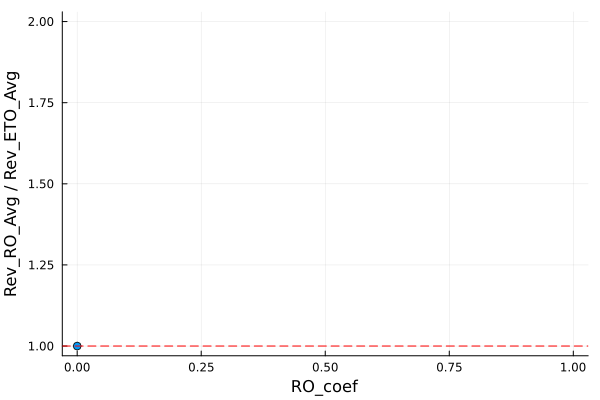

In [12]:
ratio = Rev_RO_Avg ./ mean(Rev_ETO)
plot(RO_coef_all, ratio, marker=:o, xlabel="RO_coef", ylabel="Rev_RO_Avg / Rev_ETO_Avg", legend=false)
hline!([1.0], linestyle=:dash, color=:red, label="y=1.0")
# savefig(plt, "Rev_RO_Avg_vs_Rev_ETO_Avg.png")  # 保存为当前目录下的PNG图片

In [13]:
plot_boxplot(RO_coef_all[1:5],Rev_ETO,Rev_RO)

BoundsError: BoundsError: attempt to access 1-element Vector{Float64} at index [1:5]

### offdiag is positive

In [14]:
# offdiag_sign = "positive";
# Params = set_Params(N, N_u, K, S_train, S_test, offdiag_sign, max_offdiag, P_bar, RO_coef_all, seed)

In [15]:
# sub_file_name = "N=$(N)_N_u=$(N_u)_K=$(K)_S_train=$(S_train)_offdiag_sign=$(offdiag_sign)_max_offdiag=$(max_offdiag)/"
# this_data_file = string(data_dir,project_name,sub_file_name)
# if !isdir(this_data_file)
#     mkpath(this_data_file)
# end
# save(string(this_data_file, "Params.jld2"), Params);

In [16]:
# Random.seed!(seed)
# Input_Data = generate_Input_Data(S_train,S_test,iterations, N, N_u, K, offdiag_sign,max_offdiag,P_bar);
# Input_Data = Calculate_Hyper_Param(RO_coef_all, iterations, N, N_u, K, Input_Data);
# save(string(this_data_file, "Input_Data.jld2"), Input_Data);

In [17]:
# print_flag=true
# RST_Oracle = Run_Oracle(iterations, N, N_u, K, Input_Data,print_flag);
# Rev_Oracle = [RST_Oracle["iter=$(iter)_Rev"] for iter in 1:iterations];
# save(string(this_data_file, "RST_Oracle.jld2"), RST_Oracle);

In [18]:
# RST_ETO = Run_ETO(iterations, N, N_u, K, Input_Data,print_flag);
# Rev_ETO = [RST_ETO["iter=$(iter)_Rev"] for iter in 1:iterations]
# println("Rev_ETO/Rev_Oracle = ",round.(Rev_ETO./Rev_Oracle,digits=4))
# save(string(this_data_file, "RST_ETO.jld2"), RST_ETO);

In [19]:
# model_name="Two_Side"
# RST_RO = Dict(); Rev_RO = Dict();
# for RO_coef in RO_coef_all
#     println("Running RO with RO_coef = ",RO_coef)
#     RST_RO_this = Run_RO_with_RO_coef(RO_coef, iterations, N, N_u, K, Input_Data, 0.0,model_name,false);
#     RST_RO["RO_coef=$(RO_coef)"] = RST_RO_this
#     Rev_RO["RO_coef=$(RO_coef)"] = [RST_RO_this["iter=$(iter)_Rev"] for iter in 1:iterations]
# end
# save(string(this_data_file, "RST_RO.jld2"), RST_RO);

In [20]:
# for RO_coef in RO_coef_all
#     Rev_RO_this = Rev_RO["RO_coef=$(RO_coef)"]
#     println("Average = ",round(mean(Rev_RO_this./Rev_ETO),digits=4),", Rev_RO/Rev_ETO for RO_coef=$(RO_coef) = ",round.(Rev_RO_this./Rev_ETO,digits=4),)
# end

### offdiag is negative

In [21]:
# offdiag_sign = "negative";
# Params = set_Params(N, N_u, K, S_train, S_test, offdiag_sign, max_offdiag, P_bar, RO_coef_all, seed)

In [22]:
# sub_file_name = "N=$(N)_N_u=$(N_u)_K=$(K)_S_train=$(S_train)_offdiag_sign=$(offdiag_sign)_max_offdiag=$(max_offdiag)/"
# this_data_file = string(data_dir,project_name,sub_file_name)
# if !isdir(this_data_file)
#     mkpath(this_data_file)
# end
# save(string(this_data_file, "Params.jld2"), Params);

In [23]:
# print_flag=true
# RST_Oracle = Run_Oracle(iterations, N, N_u, K, Input_Data,print_flag);
# Rev_Oracle = [RST_Oracle["iter=$(iter)_Rev"] for iter in 1:iterations];
# save(string(this_data_file, "RST_Oracle.jld2"), RST_Oracle);

In [24]:
# RST_ETO = Run_ETO(iterations, N, N_u, K, Input_Data,print_flag);
# Rev_ETO = [RST_ETO["iter=$(iter)_Rev"] for iter in 1:iterations]
# println("Rev_ETO/Rev_Oracle = ",round.(Rev_ETO./Rev_Oracle,digits=4))
# save(string(this_data_file, "RST_ETO.jld2"), RST_ETO);

In [25]:
# model_name="Two_Side"
# RST_RO = Dict(); Rev_RO = Dict();
# for RO_coef in RO_coef_all
#     println("Running RO with RO_coef = ",RO_coef)
#     RST_RO_this = Run_RO_with_RO_coef(RO_coef, iterations, N, N_u, K, Input_Data, 0.0,model_name,false);
#     RST_RO["RO_coef=$(RO_coef)"] = RST_RO_this
#     Rev_RO["RO_coef=$(RO_coef)"] = [RST_RO_this["iter=$(iter)_Rev"] for iter in 1:iterations]
# end
# save(string(this_data_file, "RST_RO.jld2"), RST_RO);